In [32]:
import caiman as cm 
from caiman.motion_correction import MotionCorrect, compute_metrics_motion_correction
import numpy as np
import matplotlib.pyplot as plt

# Quality Metrics for Motion Correction

In [33]:
# 2p motion correction
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
mc_rigid = MotionCorrect(
    fname = fnames,
    pw_rigid = False
)
mc_rigid.motion_correct(save_movie=True)

mc_rigid_2p = cm.load(mc_rigid.fname_tot_rig)

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)
100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


## Getting the metrics 

In [35]:
# before we get the metrics, we need to identify and remove the border pixels

shifts = mc_rigid.shifts_rig
x_shift = [shift[0] for shift in shifts]
y_shift = [shift[1] for shift in shifts]

# identify border and ...
bord_px_rig = np.ceil( # step 4: rounding up the maximum
    np.maximum( # step 3: maximum of both shifts
        np.max( # step 2: maximum of x shifts
            np.abs(x_shift) # step 1: absolute x shifts
            ),
        np.max( # step 2: maximum of y shifts
            np.abs(y_shift) # step 2: absolute y shifts
            )
    )
).astype(int)

# ... remove them
final_size_x, final_size_y = np.subtract(mc_rigid.total_template_rig.shape, 2 * bord_px_rig)

# other arguments
win_size = 100 # A larger window size can capture more global movements but may miss finer, local changes.
swap_dim = False # set to True if your dataset has time in last axis (matlab format apparently)
resize_fact_flow = 0.2 # downsample by a factor of 5 for faster computation of Residual Optical Flow


# Now! Let's get the metrics or raw data
tmpl_orig, correlations_orig, flows_orig, norms_orig, crispness_orig = compute_metrics_motion_correction(
    fname = fnames[0], 
    final_size_x = final_size_x, 
    final_size_y = final_size_y, 
    swap_dim = swap_dim, 
    winsize = win_size, 
    play_flow = False, 
    resize_fact_flow = resize_fact_flow
)

# Also for the rigid motion corrected data
tmpl_rig, correlations_rig, flows_rig, norms_rig, crispness_rig = compute_metrics_motion_correction(
    fname = mc_rigid.fname_tot_rig[0], 
    final_size_x = final_size_x, 
    final_size_y = final_size_y, 
    swap_dim = swap_dim, 
    winsize = win_size, 
    play_flow = False, 
    resize_fact_flow = resize_fact_flow
)


## Crispness 

In [36]:
crispness_orig, crispness_rig

(1956.59, 2782.0554)

## Correlation

(0.3, 0.7)

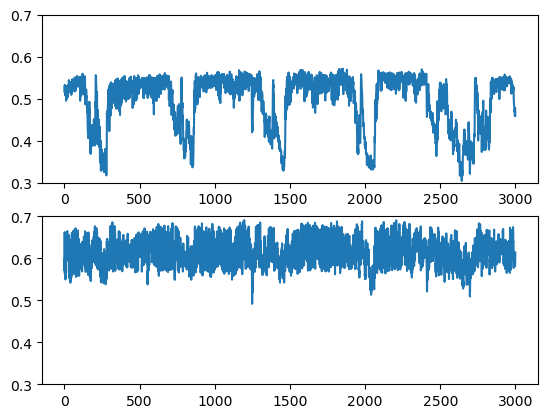

In [39]:
plt.subplot(211)
plt.plot(correlations_orig)
plt.ylim(0.3, 0.7)

plt.subplot(212)
plt.plot(correlations_rig)
plt.ylim(0.3, 0.7)

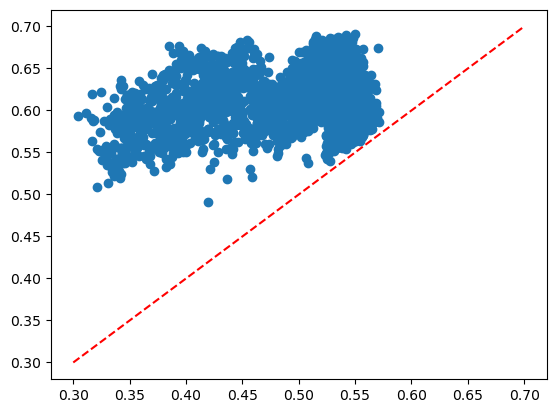

In [44]:
plt.scatter(correlations_orig, correlations_rig)
plt.plot([0.3, 0.7], [0.3, 0.7], 'r--')

## Residual Optical Flow

In [46]:
# fls = [
#        cm.paths.fname_derived_presuffix(mc_rigid.fname_tot_rig[0], 'metrics', swapsuffix='npz'),
#        cm.paths.fname_derived_presuffix(mc_rigid.fname[0],         'metrics', swapsuffix='npz'),
#       ]

# plt.figure(figsize = (20,10))
# for cnt, fl, metr in zip(range(len(fls)), fls, ['rigid','raw']):
#     with np.load(fl) as ld:
#         print(ld.keys())
#         print(fl)
#         print(str(np.mean(ld['norms'])) + '+/-' + str(np.std(ld['norms'])) +
#               ' ; ' + str(ld['smoothness']) + ' ; ' + str(ld['smoothness_corr']))
        
#         plt.subplot(len(fls), 3, 1 + 3 * cnt)
#         plt.ylabel(metr)
#         print(f"Loading data with base {fl[:-12]}")
#         try:
#             mean_img = np.mean(
#             cm.load(fl[:-12] + '.mmap'), 0)[12:-12, 12:-12]
#         except:
#             try:
#                 mean_img = np.mean(
#                     cm.load(fl[:-12] + '.tif'), 0)[12:-12, 12:-12]
#             except:
#                 mean_img = np.mean(
#                     cm.load(fl[:-12] + 'hdf5'), 0)[12:-12, 12:-12]
                    
#         lq, hq = np.nanpercentile(mean_img, [.5, 99.5])
#         plt.imshow(mean_img, vmin=lq, vmax=hq)
#         plt.title('Mean')
#         plt.subplot(len(fls), 3, 3 * cnt + 2)
#         plt.imshow(ld['img_corr'], vmin=0, vmax=.35)
#         plt.title('Corr image')
#         plt.subplot(len(fls), 3, 3 * cnt + 3)
#         flows = ld['flows']
#         plt.imshow(np.mean(
#         np.sqrt(flows[:, :, :, 0]**2 + flows[:, :, :, 1]**2), 0), vmin=0, vmax=0.3)
#         plt.colorbar()
#         plt.title('Mean optical flow'); 